In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Step 1: Load and preprocess the dataset
load_data = pd.read_excel('/content/drive/MyDrive/optimzation/Optimization/Orders.xlsx')
load_data.head()

,id,user_id,order_number,invoice_number,note,status,created_at,updated_at,wallet_id,created_by,...,is_active.1,created_at.3,updated_at.3,deleted_at.1,phone.1,active_image,inactive_image,states_id,latlng.2,is_exclusive.1
0,3056368,135375,002_1688220105696,NaN,NaN,5,2023-07-01 14:01:45.685,2023-07-03 13:10:07.995,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
1,3056527,49468,002_1688271815074,NaN,NaN,4,2023-07-02 04:23:35.060,2023-07-03 09:35:21.626,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
2,3055881,71128,001_1687934363647,NaN,NaN,6,2023-06-28 06:39:23.629,2023-07-03 13:05:18.259,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
3,3056381,228952,001_1688223773929,NaN,NaN,4,2023-07-01 15:02:53.910,2023-07-03 10:56:23.849,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
4,3056283,66729,001_1688202031227,NaN,NaN,4,2023-07-01 09:00:31.210,2023-07-03 10:47:14.621,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False


In [ ]:
# Filter rows where 'specific_column_name' has a value of 1
load_data = load_data[load_data['type'] == 1]
load_data

,id,user_id,order_number,invoice_number,note,status,created_at,updated_at,wallet_id,created_by,...,is_active.1,created_at.3,updated_at.3,deleted_at.1,phone.1,active_image,inactive_image,states_id,latlng.2,is_exclusive.1
0,3056368,135375,002_1688220105696,NaN,NaN,5,2023-07-01 14:01:45.685,2023-07-03 13:10:07.995,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
1,3056527,49468,002_1688271815074,NaN,NaN,4,2023-07-02 04:23:35.060,2023-07-03 09:35:21.626,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
2,3055881,71128,001_1687934363647,NaN,NaN,6,2023-06-28 06:39:23.629,2023-07-03 13:05:18.259,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
3,3056381,228952,001_1688223773929,NaN,NaN,4,2023-07-01 15:02:53.910,2023-07-03 10:56:23.849,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
4,3056283,66729,001_1688202031227,NaN,NaN,4,2023-07-01 09:00:31.210,2023-07-03 10:47:14.621,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,3056654,39011,002_1688285355953,NaN,NaN,5,2023-07-02 08:09:15.924,2023-07-03 10:47:27.358,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
678,3056698,195199,001_1688289179391,NaN,NaN,5,2023-07-02 09:12:59.375,2023-07-03 05:25:10.141,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
679,3056331,97078,001_1688214380483,NaN,NaN,5,2023-07-01 12:26:20.418,2023-07-03 09:54:01.290,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
680,3055781,34961,001_1687875082298,NaN,NaN,5,2023-06-27 14:11:22.277,2023-07-03 07:23:10.089,NaN,NaN,...,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,NaN,4234500060,NaN,NaN,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False


In [ ]:
# Check for duplicate rows in the entire DataFrame
duplicates = load_data[load_data.duplicated()]
duplicates

,id,user_id,order_number,invoice_number,note,status,created_at,updated_at,wallet_id,created_by,...,is_active.1,created_at.3,updated_at.3,deleted_at.1,phone.1,active_image,inactive_image,states_id,latlng.2,is_exclusive.1


In [ ]:
# Drop columns with all NaN or missing values
load_data = load_data.dropna(axis=1, how='all')
load_data

,id,user_id,order_number,status,created_at,updated_at,coupon_id,delivered_at,previous_status,special_discount,...,id.3,name.1,code,is_active.1,created_at.3,updated_at.3,phone.1,states_id,latlng.2,is_exclusive.1
0,3056368,135375,002_1688220105696,5,2023-07-01 14:01:45.685,2023-07-03 13:10:07.995,NaN,2023-07-02 19:00:00,NaN,0,...,2,Lahore,2,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
1,3056527,49468,002_1688271815074,4,2023-07-02 04:23:35.060,2023-07-03 09:35:21.626,NaN,2023-07-02 19:00:00,NaN,0,...,2,Lahore,2,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
2,3055881,71128,001_1687934363647,6,2023-06-28 06:39:23.629,2023-07-03 13:05:18.259,NaN,2023-07-02 19:00:00,3.0,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
3,3056381,228952,001_1688223773929,4,2023-07-01 15:02:53.910,2023-07-03 10:56:23.849,NaN,2023-07-02 19:00:00,NaN,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
4,3056283,66729,001_1688202031227,4,2023-07-01 09:00:31.210,2023-07-03 10:47:14.621,NaN,2023-07-02 19:00:00,NaN,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,3056654,39011,002_1688285355953,5,2023-07-02 08:09:15.924,2023-07-03 10:47:27.358,NaN,2023-07-02 19:00:00,NaN,0,...,2,Lahore,2,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,1,"{""lat"": 31.5204, ""lng"": 74.3587}",False
678,3056698,195199,001_1688289179391,5,2023-07-02 09:12:59.375,2023-07-03 05:25:10.141,NaN,2023-07-02 19:00:00,NaN,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
679,3056331,97078,001_1688214380483,5,2023-07-01 12:26:20.418,2023-07-03 09:54:01.290,NaN,2023-07-02 19:00:00,NaN,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False
680,3055781,34961,001_1687875082298,5,2023-06-27 14:11:22.277,2023-07-03 07:23:10.089,NaN,2023-07-02 19:00:00,NaN,0,...,1,Karachi,1,True,2020-08-20 08:57:19.976,2020-08-20 08:57:19.976,4234500060,2,"{""lat"": 24.8607, ""lng"": 67.0011}",False


In [ ]:
# Drop columns
columns_to_keep = ['user_id', 'cart_id', 'seller_id', 'latlng.1', 'sub_area_id', 'area_id', 'user_type','out_of_service_area', 'city_id']
columns_to_drop = [col for col in load_data.columns if col not in columns_to_keep]
data_filtered = load_data.drop(columns_to_drop, axis=1)
data_filtered

,user_id,cart_id,seller_id,city_id,latlng.1,sub_area_id,area_id,user_type,out_of_service_area
0,135375,62103.0,103714,2,"{""lat"": 31.42514973760504, ""lng"": 74.221628028...",3811.0,796.0,3,False
1,49468,62301.0,103714,2,"{""lat"": 31.45394170821718, ""lng"": 74.284366238...",3819.0,796.0,3,False
2,71128,61513.0,255060,1,"{""lat"": 24.8824991, ""lng"": 66.9895397}",3797.0,798.0,3,False
3,228952,61536.0,168406,1,"{""lat"": 24.918636987706503, ""lng"": 66.98044890...",3797.0,798.0,3,False
4,66729,62032.0,255060,1,"{""lat"": 24.92213641246442, ""lng"": 66.984129231...",3797.0,798.0,3,False
...,...,...,...,...,...,...,...,...,...
677,39011,62420.0,237340,2,"{""lat"": 31.45221647625584, ""lng"": 74.218266885...",3811.0,796.0,3,False
678,195199,62465.0,231704,1,"{""lat"": 24.875632071914985, ""lng"": 67.16426169...",3803.0,800.0,3,False
679,97078,39335.0,255060,1,"{""lat"": 24.92393063389879, ""lng"": 66.996681634...",3797.0,798.0,3,False
680,34961,61337.0,235347,1,"{""lat"": 24.85265230494111, ""lng"": 67.060686182...",3794.0,797.0,3,False


In [ ]:
data_filtered = data_filtered.dropna(subset=['latlng.1'])
data_filtered = data_filtered[load_data['out_of_service_area'] == False]
data_filtered

,user_id,cart_id,seller_id,city_id,latlng.1,sub_area_id,area_id,user_type,out_of_service_area
0,135375,62103.0,103714,2,"{""lat"": 31.42514973760504, ""lng"": 74.221628028...",3811.0,796.0,3,False
1,49468,62301.0,103714,2,"{""lat"": 31.45394170821718, ""lng"": 74.284366238...",3819.0,796.0,3,False
2,71128,61513.0,255060,1,"{""lat"": 24.8824991, ""lng"": 66.9895397}",3797.0,798.0,3,False
3,228952,61536.0,168406,1,"{""lat"": 24.918636987706503, ""lng"": 66.98044890...",3797.0,798.0,3,False
4,66729,62032.0,255060,1,"{""lat"": 24.92213641246442, ""lng"": 66.984129231...",3797.0,798.0,3,False
...,...,...,...,...,...,...,...,...,...
677,39011,62420.0,237340,2,"{""lat"": 31.45221647625584, ""lng"": 74.218266885...",3811.0,796.0,3,False
678,195199,62465.0,231704,1,"{""lat"": 24.875632071914985, ""lng"": 67.16426169...",3803.0,800.0,3,False
679,97078,39335.0,255060,1,"{""lat"": 24.92393063389879, ""lng"": 66.996681634...",3797.0,798.0,3,False
680,34961,61337.0,235347,1,"{""lat"": 24.85265230494111, ""lng"": 67.060686182...",3794.0,797.0,3,False


import numpy as np
from google.colab import autoviz
df_2651164767748423374 = autoviz.get_registered_df('df_2651164767748423374')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2651164767748423374, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8705870518590008351 = autoviz.get_registered_df('df_8705870518590008351')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8705870518590008351, *['cart_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2827310570035290899 = autoviz.get_registered_df('df_2827310570035290899')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2827310570035290899, *['seller_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2248823365997437515 = autoviz.get_registered_df('df_2248823365997437515')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2248823365997437515, *['city_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2086246525774232236 = autoviz.get_registered_df('df_2086246525774232236')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2086246525774232236, *['user_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_910996054464852279 = autoviz.get_registered_df('df_910996054464852279')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_910996054464852279, *['cart_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3290440719146617086 = autoviz.get_registered_df('df_3290440719146617086')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3290440719146617086, *['seller_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3364027579718929211 = autoviz.get_registered_df('df_3364027579718929211')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3364027579718929211, *['city_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4755192711586307418 = autoviz.get_registered_df('df_4755192711586307418')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4755192711586307418, *[[['user_id', 'cart_id'], ['cart_id', 'seller_id'], ['seller_id', 'city_id'], ['city_id', 'sub_area_id']]], **{})
chart

In [ ]:
# Step 2: Extract 'lat' and 'lng' values from 'latlng' column
def extract_lat(row):
    return eval(row)['lat']

def extract_lng(row):
    return eval(row)['lng']

data_filtered['lat'] = data_filtered['latlng.1'].apply(extract_lat)
data_filtered['lng'] = data_filtered['latlng.1'].apply(extract_lng)

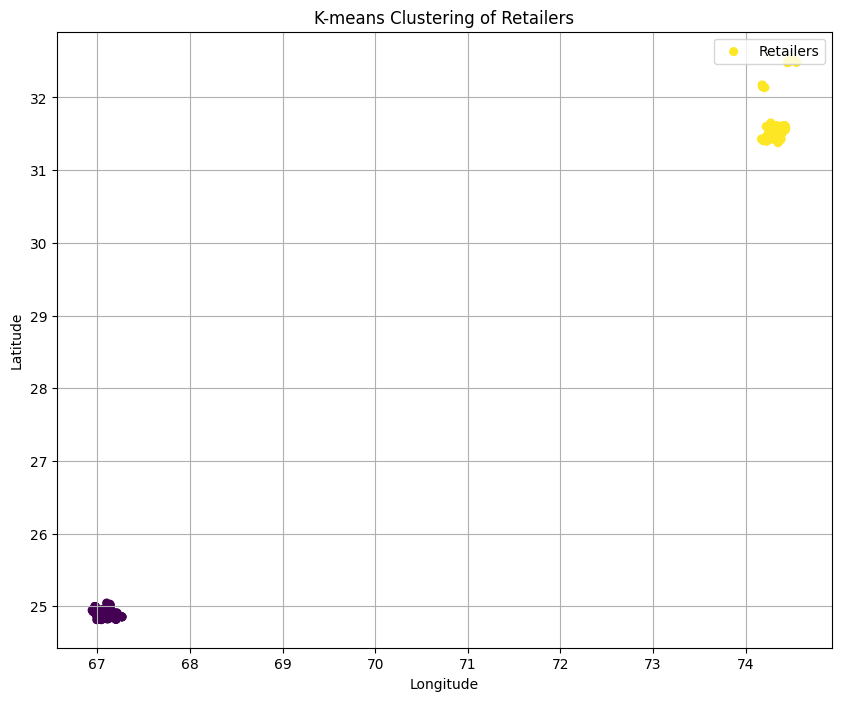

In [ ]:

# Create a K-means cluster map
plt.figure(figsize=(10, 8))
plt.scatter(data_filtered['lng'], data_filtered['lat'], c=data_filtered['cluster'], cmap='viridis', s=30, label='Retailers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Retailers')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
#Optimization Algorithm (k-means clustering)
costs = []
max_k = 10  # Set a maximum value of k for the elbow method
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_filtered[['lat', 'lng']])
    costs.append(kmeans.inertia_)
costs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[15380.35890719841,
 37.1683150357497,
 5.627760712561747,
 4.0735799645619855,
 2.9638438521089308,
 2.1368023411490227,
 1.8443282135490162,
 1.482261990477497,
 1.180125633323726,
 0.9181604090892985]

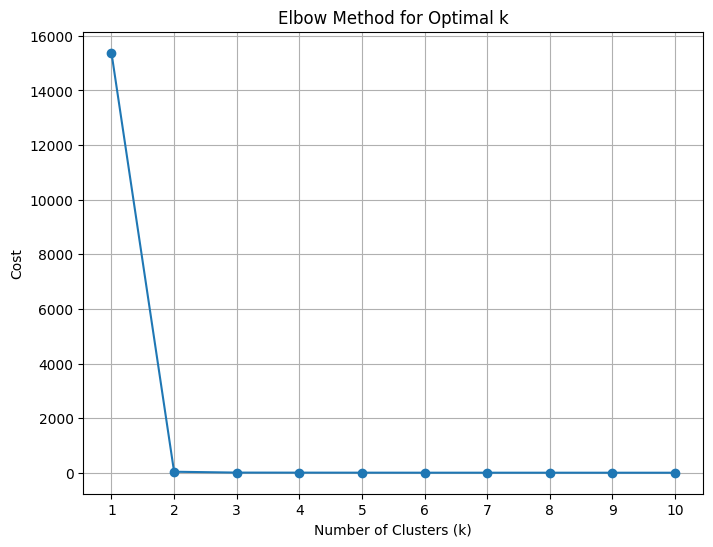

In [ ]:
# Step 5: Elbow Method to find the optimal k
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [ ]:
# Perform k-means clustering with the optimal k
optimal_k = 2 # Replace this with the value obtained from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_filtered['cluster'] = kmeans.fit_predict(data_filtered[['lat', 'lng']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Identify the optimal locations of centers
# For each cluster, the centroid represents a potential location for a satellite center.
center_locations = kmeans.cluster_centers_
center_locations

array([[24.89678495, 67.09773093],
       [31.60020562, 74.31916238]])

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim


# Initialize the geolocator
geolocator = Nominatim(user_agent="myGeocoder")

import pandas as pd
from geopy.geocoders import Nominatim


# Convert the NumPy array to a pandas DataFrame
center_locations_df = pd.DataFrame(center_locations, columns=['lat', 'lng'])

# Initialize the geolocator
geolocator = Nominatim(user_agent="myGeocoder")

# Function to get area name from latitude and longitude
def get_area_name(lat, lng):
    location = geolocator.reverse((lat, lng), exactly_one=True)
    return location.address if location else None

# Apply the function to each row in 'center_locations_df'
center_locations_df['area_name'] = center_locations_df.apply(lambda row: get_area_name(row['lat'], row['lng']), axis=1)

# Now 'center_locations_df' DataFrame will have an additional column 'area_name' containing the corresponding area names for each centroid.
center_locations_df

,lat,lng,area_name
0,24.896785,67.097731,"C12, اسٹیڈیم روڈ, Block A, ڈالمیا مجاہد کالونی..."
1,31.600206,74.319162,"حنیف پارک, بادامی باغ, اندرون شہر, پنجاب, 5401..."
